## Machine Learning Supervised

## Table of Contents

So far, we have focused on using KNN as our model to predict California housing prices. However, there are other models worth exploring. Today, we will experiment with both simple Linear Regression and Decision Trees to understand how they explain our target variable. In machine learning, we typically choose our model based on the relationship between our features and the target variable, or simply by selecting the model with the higher score

Yesterday, we applied some feature engineering techniques, and our model indeed increased its performance. Now, let's see how Linear Regression and Decision Tree perform when we apply the same feature engineering techniques.

#### Loading and preparing the data

In [1]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
california = fetch_california_housing()
print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df_cali = pd.DataFrame(california["data"], columns = california["feature_names"])
df_cali["median_house_value"] = california["target"]

df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Normalization & Feature Selection

Like we did in Feature Engineering lesson, we are going to normalize our data and select a subset of columns as our features.

#### Train Test Split

In [4]:
features = df_cali.drop(columns = ["median_house_value","AveOccup", "Population", "AveBedrms"])
target = df_cali["median_house_value"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

Create an instance of the normalizer

In [6]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [7]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [8]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,0.257838,0.098039,0.048751,0.137088,0.677291
1,0.268265,1.000000,0.031762,0.551541,0.190239
2,0.236783,0.490196,0.027097,0.137088,0.632470
3,0.066578,0.725490,0.017987,0.156217,0.606574
4,0.184591,1.000000,0.023207,0.163656,0.596614


In [9]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,0.251852,0.411765,0.034147,0.004251,0.727092
1,0.364112,0.607843,0.037296,0.146652,0.635458
2,0.265431,0.549020,0.036045,0.649309,0.250000
3,0.134564,0.705882,0.029397,0.070138,0.871514
4,0.310685,0.470588,0.024621,0.557917,0.191235


## Linear Regression

Let's create an instance of Linear Regression model.

In [10]:
lin_reg = LinearRegression()

Training Linear Regression with our normalized data

In [11]:
lin_reg.fit(X_train_norm, y_train)

LinearRegression()

Evaluate model's performance

In [12]:
pred = lin_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 0.5478401831409729
RMSE 0.7424116296739353
R2 score 0.5773051453722333


Linear Regression yielding a worse score than our previous model, KNN.

In Linear Regression, we often assess feature importance by examining the coefficients in the model. These coefficients indicate the impact of each feature on the model's predictions.

- Determine the coefficients (β) in the linear regression equation corresponding to each feature.
- The magnitude of these coefficients reflects the relative importance of the features. **Greater absolute values suggest more substantial impacts.**

In [13]:
lin_reg.coef_

array([ 5.38464606,  0.49426223,  2.47710724, -4.29392732, -4.66045731])

In [14]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm.columns, lin_reg.coef_)}
lin_reg_coef

{'MedInc': 5.384646061206898,
 'HouseAge': 0.49426222880241744,
 'AveRooms': 2.4771072369823193,
 'Latitude': -4.293927324319664,
 'Longitude': -4.6604573065746475}

In [15]:
lin_reg.intercept_

4.100169305445684

We can conclude that **Median Income** have the highest impact in our model.

## Decision Tree

So far between KNN and Liner Regression, the first yield a better score, let's see how a Decision Tree performs.

- Initialize a Decision Tree instance

- Setting max_depth as 10, this means we will allow our tree to split 10 times

In [22]:
tree = DecisionTreeRegressor(max_depth=3)

- Training the model

In [23]:
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=3)

- Evaluate the model

In [24]:
X_train_norm

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,0.257838,0.098039,0.048751,0.137088,0.677291
1,0.268265,1.000000,0.031762,0.551541,0.190239
2,0.236783,0.490196,0.027097,0.137088,0.632470
3,0.066578,0.725490,0.017987,0.156217,0.606574
4,0.184591,1.000000,0.023207,0.163656,0.596614
...,...,...,...,...,...
16507,0.269831,0.372549,0.036536,0.608927,0.307769
16508,0.166453,0.509804,0.031923,0.524973,0.344622
16509,0.186053,0.588235,0.019814,0.429330,0.244024
16510,0.353899,0.647059,0.026190,0.114772,0.639442


In [25]:
y_test

14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
         ...  
6655     1.695
3505     2.046
1919     1.286
1450     2.595
4148     1.676
Name: median_house_value, Length: 4128, dtype: float64

In [26]:
pred = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_norm, y_test))

MAE 0.6274247590445388
RMSE 0.8390894884942774
R2 score 0.460049447682797


Often we check what are the most relevant features, like we did before in Linear Regression.

In [21]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm.columns, tree.feature_importances_)}
tree_importance           

{'MedInc': 0.6218224032421495,
 'HouseAge': 0.05858835203564956,
 'AveRooms': 0.04593334603810581,
 'Latitude': 0.13996863169717796,
 'Longitude': 0.13368726698691707}

In [43]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_norm.columns))
print(tree_viz)


|--- MedInc <= 0.31
|   |--- MedInc <= 0.18
|   |   |--- AveRooms <= 0.02
|   |   |   |--- MedInc <= 0.12
|   |   |   |   |--- AveRooms <= 0.02
|   |   |   |   |   |--- Latitude <= 0.16
|   |   |   |   |   |   |--- Longitude <= 0.59
|   |   |   |   |   |   |   |--- value: [4.50]
|   |   |   |   |   |   |--- Longitude >  0.59
|   |   |   |   |   |   |   |--- Longitude <= 0.72
|   |   |   |   |   |   |   |   |--- HouseAge <= 0.23
|   |   |   |   |   |   |   |   |   |--- Latitude <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [3.25]
|   |   |   |   |   |   |   |   |   |--- Latitude >  0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [3.50]
|   |   |   |   |   |   |   |   |--- HouseAge >  0.23
|   |   |   |   |   |   |   |   |   |--- Latitude <= 0.13
|   |   |   |   |   |   |   |   |   |   |--- value: [1.94]
|   |   |   |   |   |   |   |   |   |--- Latitude >  0.13
|   |   |   |   |   |   |   |   |   |   |--- value: [1.49]
|   |   |   |   |   |   |   |--- Longitude >  

In [28]:
from sklearn.tree import plot_tree

### TREE VISUALIZATION

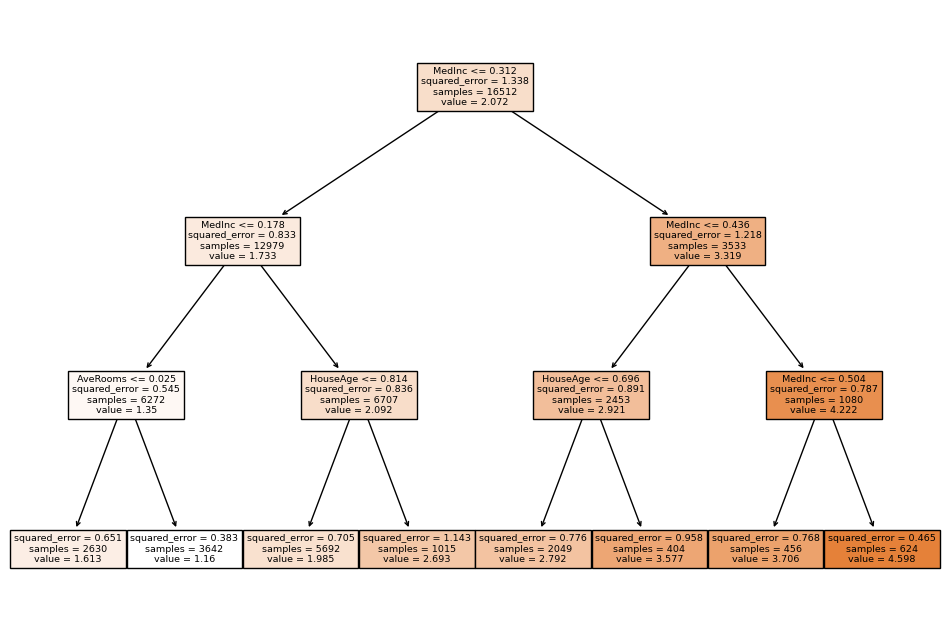

In [29]:
plt.figure(figsize=(12,8))  # Set plot size
plot_tree(tree, feature_names=X_train.columns, filled=True)

plt.show()

A bit overwhelming to see, let's use graphviz library.

**Note**: you will need to install graphivz - pip install graphviz

In [29]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(12,8))  # Set plot size
plot_tree(tree, feature_names=X_train.columns,  filled=True)

[Text(0.5631065425334324, 0.9545454545454546, 'MedInc <= 0.312\nsquared_error = 1.338\nsamples = 16512\nvalue = 2.072'),
 Text(0.29559806835066865, 0.8636363636363636, 'MedInc <= 0.178\nsquared_error = 0.833\nsamples = 12979\nvalue = 1.733'),
 Text(0.13848904160475484, 0.7727272727272727, 'AveRooms <= 0.025\nsquared_error = 0.545\nsamples = 6272\nvalue = 1.35'),
 Text(0.06802563150074294, 0.6818181818181818, 'MedInc <= 0.118\nsquared_error = 0.651\nsamples = 2630\nvalue = 1.613'),
 Text(0.030414190193164933, 0.5909090909090909, 'AveRooms <= 0.017\nsquared_error = 0.548\nsamples = 1402\nvalue = 1.364'),
 Text(0.013187221396731055, 0.5, 'Latitude <= 0.16\nsquared_error = 0.833\nsamples = 398\nvalue = 1.799'),
 Text(0.005200594353640416, 0.4090909090909091, 'Longitude <= 0.591\nsquared_error = 0.327\nsamples = 143\nvalue = 1.51'),
 Text(0.004457652303120356, 0.3181818181818182, 'squared_error = 0.0\nsamples = 1\nvalue = 4.5'),
 Text(0.005943536404160475, 0.3181818181818182, 'Longitude <= 

- We will train a decision tree, in this case with max_depth=2 to better see the diagram

In [15]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_norm.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'